Name: Lorcán O'Donoghue
    
Student ID: 12151718

### Imports

In [863]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from feature_engine.creation import CyclicalFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

Need to load the $bank.csv$ file and the explore the data it contains.

In [864]:
dataset = pd.read_csv('./bank.csv')

First lets see what are the columns this dataset has and also the first and last 5 rows to give some insight into the what I will be working with.

In [865]:
print(dataset.columns)
print(len(dataset.columns))

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')
17


Below is taken from the [link](https://archive.ics.uci.edu/dataset/222/bank+marketing) to help describe the columns above and what they actually mean and represent.

1. __age__ - The age of the person
2. __job__ - Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. __marital__ - Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. __education__ - (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. __default__ -has credit in default?
6. __balance__ -Aaverage yearly balance	euros
7. __housing__ - Has housing loan?
8. __loan__ - Has personal loan?
9. __contact__ - Contact communication type (categorical: 'cellular','telephone')
10. __day__ - Last contact day of the week
11. __month__ - Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. __duration__ - Last contact duration, in seconds (numeric)
13. __campaign__ - number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. __pdays__ - number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
15. __previous__ - number of contacts performed before this campaign and for this client
16. __poutcome__ - outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. __subscribed__ - has the client subscribed a term deposit?

__subscribed__ is the output target, and therefore what is considered when training our model on the dataset.

In [866]:
dataset.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [867]:
dataset.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### Formulate a particular question that might be interesting to answer by exploring the bank dataset 

Does the person's `balance`, `education` or `job` play a strong role in whether the person subscribes to the term deposit?

Clearly from this only the Age is missing values.
From the above the `balance` looks like it might have a skew due to a __mean__ of __1413.663500__ and __median__ of __551.000000__

### Calculate statistics for the numerical 

In [868]:
# Will use the pandas describe function to explore the dataset's numerical attributes

dataset.describe(include=[np.number])

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

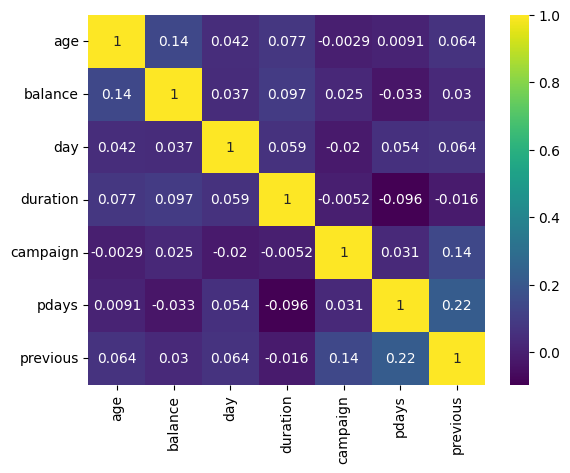

In [869]:
#correlation matrix
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show() # Hides the <Axes: > output

### Conclusion - Numerical Analysis

The `age` has (2000-1988) 12 missing values.
All the other columns have full data provided.

The `balance`  looks to have a skew due to the large difference between the `mean` (1413.663500) and `median` (551).
It also has a large standard deviation.

I cannot see a strong correlation between any of the attributes, with the strongest albeit low between `age` and `balance` and `pday` and `previous`.

### Calculate statistics for the categorical attributes 

In [870]:
# Will use the pandas describe function to explore the dataset's categorical attributes

dataset.describe(include=[object])

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

Compared to the numerical data, the categorical has far more missing data points.
The `job` is missing 10, `education` is missing 104, `contact` is missing 191 and `poutcome` has the most with 454 missing.

There are 4 columns `default`,`housing`,`loan`,`contact` all being 2 categories.
There are 3 columns `marital`,`education`,`poutcome` all being 3 categories.
While `job` has the most variety with 11.

`subscribed` has 50% no vs yes.
23% of the `job` is management and 83% `contact` are cellular.



In [871]:
dataset['balance'].value_counts()

balance
0       86
1        9
272      8
303      7
655      6
        ..
457      1
511      1
1355     1
2549     1
6403     1
Name: count, Length: 1274, dtype: int64

In [872]:
balance_gt_mean = dataset[dataset['balance'] > dataset['balance'].mean()].shape[0]

print("Number of rows where balance is greater than the mean:", balance_gt_mean)

Number of rows where balance is greater than the mean: 563


So about 28% of people have a balance greater then the mean. Lets see how many have subscribed.

In [873]:
balance_gt_mean_subscribed = dataset[(dataset['balance'] > dataset['balance'].mean()) & (dataset['subscribed'] == 'yes')].shape[0]

print("Greater than mean balance with subscription:", balance_gt_mean_subscribed)
print(f"So the percentage of above : {balance_gt_mean_subscribed/balance_gt_mean:.0%}")

Greater than mean balance with subscription: 388
So the percentage of above : 69%


In [874]:
balance_gt_first_quantile = dataset[dataset['balance'] > dataset['balance'].quantile(0.25)].shape[0]

print("Number of rows where balance is greater than the mean:", balance_gt_first_quantile)

balance_gt_first_quantile_subscribed = dataset[(dataset['balance'] > dataset['balance'].quantile(0.25)) & (dataset['subscribed'] == 'yes')].shape[0]

print("Greater than mean balance with subscription:", balance_gt_first_quantile_subscribed)
print(f"So the percentage of above : {balance_gt_first_quantile_subscribed/balance_gt_first_quantile:.0%}")

Number of rows where balance is greater than the mean: 1500
Greater than mean balance with subscription: 826
So the percentage of above : 55%


From the above it shows a strong indication that when someone has a balance greater than the `mean` there is a 70% chance they are subscribed, and even having above the first quantile there is a slightly better chance of being subscribed then a 50%.

In [875]:
dataset['education'].value_counts()

education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64

In [876]:
dataset['job'].value_counts()

job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

In [877]:
dataset[(dataset['balance'] > dataset['balance'].mean()) & (dataset['subscribed'] == 'yes')]['job'].value_counts()

job
management       105
retired           71
technician        49
admin.            42
student           34
blue-collar       24
services          18
unemployed        15
self-employed     12
entrepreneur       9
housemaid          6
Name: count, dtype: int64

In [878]:
dataset[(dataset['balance'] > dataset['balance'].mean()) & (dataset['subscribed'] == 'yes')]['job'].value_counts() / dataset['job'].value_counts()

job
admin.           0.170040
blue-collar      0.080537
entrepreneur     0.200000
housemaid        0.171429
management       0.227766
retired          0.438272
self-employed    0.187500
services         0.109091
student          0.354167
technician       0.140805
unemployed       0.217391
Name: count, dtype: float64

From the above those with a bigger than mean balance and more spare time based on job `retired` and `student` are more likely to be subscribed.
Does this hold ignoring balance?

In [879]:
dataset[(dataset['subscribed'] == 'yes')]['job'].value_counts() / dataset['job'].value_counts()

job
admin.           0.526316
blue-collar      0.258389
entrepreneur     0.333333
housemaid        0.571429
management       0.544469
retired          0.839506
self-employed    0.546875
services         0.303030
student          0.906250
technician       0.413793
unemployed       0.695652
Name: count, dtype: float64

This strongly holds for the `retired` and `student` ignoring the balance but also shows that `unemployed` are even more 3 times more likely ignoring the balance filter.

I wonder, do those with less then the mean `balance` subscribe more often?

In [880]:
balance_lt_mean = dataset[dataset['balance'] < dataset['balance'].mean()].shape[0]
balance_lt_mean_subscribed = dataset[(dataset['balance'] < dataset['balance'].mean()) & (dataset['subscribed'] == 'yes')].shape[0]

print("Less than mean balance with subscription:", balance_lt_mean_subscribed)
print(f"So the percentage of above : {balance_lt_mean_subscribed/balance_lt_mean:.0%}")

Less than mean balance with subscription: 612
So the percentage of above : 43%


So they are less likely.

### Conclusion
Those with higher `balance` then the mean are far more likely to be `subscribed` while those below are under a 50% likelihood to be.
That `retired`, `student` and `unemployed` are very likely to be subscribed especially when `balance` is ignored. With most of the others being just above 50%. The ones leasts likely are `blue-collar` and`services` as they are the least likely to to respond to a calling campaign during a work-day.

### Use at least two different plotting techniques to plot the distribution of some numerical attributes

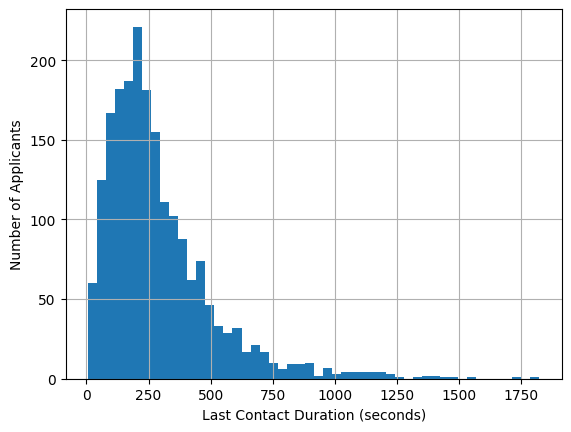

In [881]:
dataset['duration'].hist(bins=50)
plt.xlabel("Last Contact Duration (seconds)")
plt.ylabel('Number of Applicants')
plt.show()

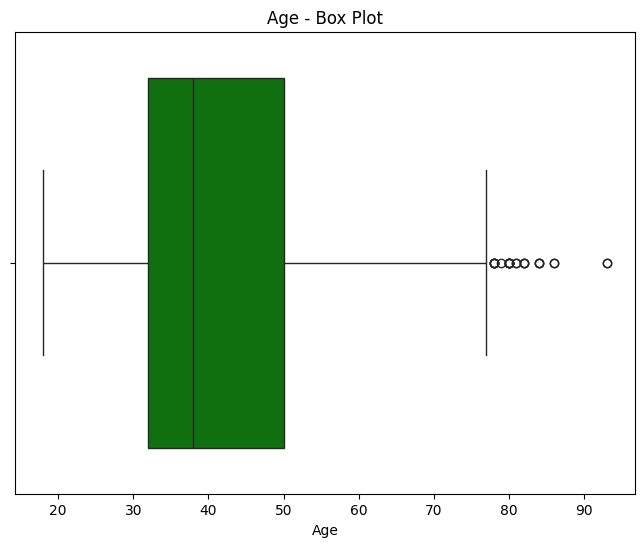

In [882]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=dataset, color='green')
plt.title('Age - Box Plot')
plt.xlabel('Age')
plt.show()

### Conclusion
The histogram showing the `duration` is positively skewed, and shows a large concentration in the 2-3 minute duration of calls.
The histogram showing the `balance` is positively skewed, with a large concentration near 0 balance. With a very large outlier at 80k.

The box plot showing the `age` clearly shows some outliers > 75, this wouldn't be something I would consider filtering out.

It looks like overly there will be many outliers in each of the attributes but where these are significant or not is till to be determined.

### Generate at least two plots with the combined distribution of attributes

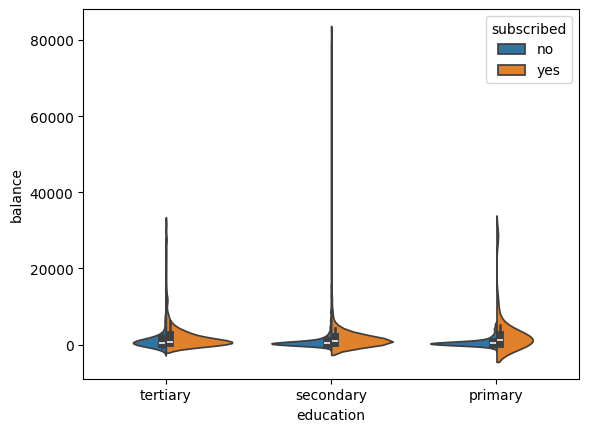

In [883]:
sns.violinplot(data=dataset, x='education', y='balance', hue='subscribed', split=True)
plt.show()

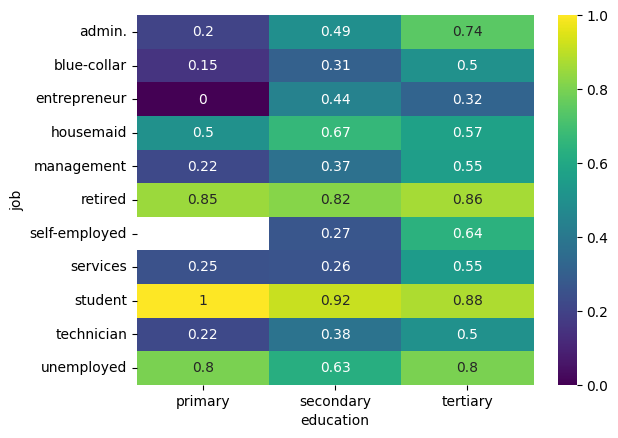

In [884]:
pivot_table_LCG = dataset.pivot_table(values='subscribed', 
                           index='job', 
                           columns='education',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True, cmap='viridis')
plt.show()

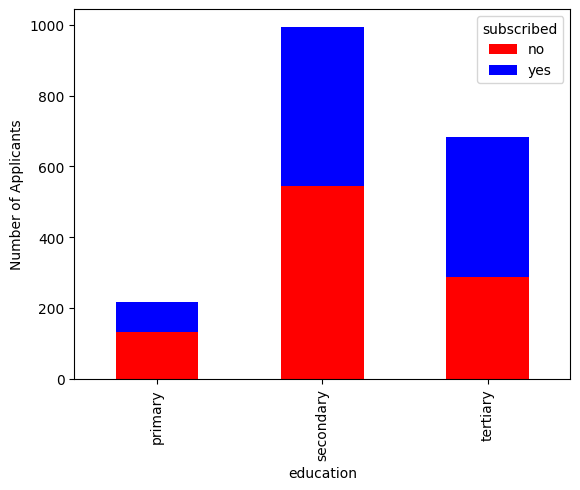

In [885]:
crosstab_CL = pd.crosstab(dataset['education'], dataset['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

### Conclusion
The violin plot that `primary` education has a more even distribution of the `balance` when `subscribed`, while all the others are not. The large 80k outlier does make it harder to read though.

The heat map shows that `student` are the most likely followed by `retired` to be `subscribed`. It also shows that the more educated the person the more likely they are to be `subscribed` in the majority of the `job` given. It is interesting to see that `student` follows the inverse of this trajectory. I added a crosstab plot which supports that the more educated the more likely to be subscribed as well.

# Task 2

In [886]:
dataset_2 = pd.read_csv('./bank.csv')
dataset_2.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [887]:
dataset_2.describe(include=[object])

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

In [888]:
dataset_2.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [889]:
dataset_2_original = dataset_2

In [890]:
dataset_2['month'].value_counts()

month
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: count, dtype: int64

I need to convert the months to `int` so that I can then convert these to Cyclical attributes later

In [891]:
# Create a mapper

month_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

dataset_2['month'] = dataset_2['month'].replace(month_mapper)

dataset_2.tail()

C:\Users\Lorca\AppData\Local\Temp\ipykernel_32812\233169052.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_2['month'] = dataset_2['month'].replace(month_mapper)


age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      9       327         2     -1         0      NaN   
1996   cellular   16      9      1334         2     -1         0      NaN   
1997  telephone   17      9       231         1     -1         0      NaN   
1998        NaN   20      9       185         1     -1         0      NaN   
1999   cellular   22      9       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [892]:
cyclical = CyclicalFeatures(variables=['day', 'month'], drop_original=True)
dataset_2 = cyclical.fit_transform(dataset_2)

dataset_2.value_counts()

age   job      marital   education  default  balance  housing  loan  contact    duration  campaign  pdays  previous  poutcome  subscribed  day_sin    day_cos    month_sin  month_cos
19.0  student  single    primary    no        608     no       no    cellular   236       1         180    2         success   yes          0.651372  -0.758758   0.500000  -0.866025    1
47.0  admin.   married   secondary  no        3676    no       no    cellular   415       2         342    1         other     yes          0.101168  -0.994869  -0.500000  -0.866025    1
                                              368     no       no    cellular   403       1         87     6         success   yes         -0.897805  -0.440394   0.500000  -0.866025    1
                                              70      yes      no    cellular   144       4         374    2         success   yes          0.848644   0.528964   0.866025  -0.500000    1
               divorced  secondary  no        207     yes      no    c

Above correctly transforms `day` and `month` into Cyclical attributes, I dropped the original `day` and `month` for the new Cyclical versions of sin and cos.

In [893]:
# first one-hot encode the categorical columns with NaNs

dataset_2 = pd.get_dummies(dataset_2, columns=['education', 'contact', 'poutcome', 'job'],
                        dummy_na=True,
                        drop_first=True)
dataset_2.tail()

age  marital default  balance housing loan  duration  campaign  pdays  \
1995  20.0   single      no     2785      no   no       327         2     -1   
1996  28.0   single      no      127      no   no      1334         2     -1   
1997  81.0  married      no     1154      no   no       231         1     -1   
1998  46.0  married      no     4343     yes   no       185         1     -1   
1999  40.0  married      no     6403      no   no       208         2     -1   

      previous  ... job_entrepreneur  job_housemaid  job_management  \
1995         0  ...            False          False           False   
1996         0  ...            False          False           False   
1997         0  ...            False          False           False   
1998         0  ...            False          False           False   
1999         0  ...             True          False           False   

      job_retired  job_self-employed  job_services  job_student  \
1995        False              False         False         True   
1996        False              False         False        False   
1997         True              False         False        False   
1998        False              False          True        False   
1999        False              False         False        False   

      job_technician  job_unemployed  job_nan  
1995           False           False    False  
1996           False           False    False  
1997           False           False    False  
1998           False           False    False  
1999           False           False    False  

[5 rows x 34 columns]

In [894]:
# now one-hot encode all other categorical columns
dataset_2 = pd.get_dummies(dataset_2, drop_first=True)
dataset_2.head()

age  balance  duration  campaign  pdays  previous   day_sin  day_cos  \
0  32.0      392       957         2    131         2  0.201299  0.97953   
1  39.0      688       233         2    133         1  0.201299  0.97953   
2  59.0     1035       126         2    239         1  0.201299  0.97953   
3  47.0      398       274         1    238         2  0.201299  0.97953   
4  54.0     1004       479         1    307         1  0.201299  0.97953   

   month_sin  month_cos  ...  job_student  job_technician  job_unemployed  \
0   0.866025       -0.5  ...        False            True           False   
1   0.866025       -0.5  ...        False            True           False   
2   0.866025       -0.5  ...        False           False           False   
3   0.866025       -0.5  ...        False           False           False   
4   0.866025       -0.5  ...        False           False           False   

   job_nan  marital_married  marital_single  default_yes  housing_yes  \
0    False            False            True        False         True   
1    False            False           False        False         True   
2    False             True           False        False         True   
3    False             True           False        False         True   
4    False             True           False        False         True   

   loan_yes  subscribed_yes  
0     False           False  
1      True           False  
2      True           False  
3      True           False  
4     False           False  

[5 rows x 35 columns]

In [895]:
# Find the number of nulls/NaNs in the dataset
dataset_2.isna().sum()

age                    12
balance                 0
duration                0
campaign                0
pdays                   0
previous                0
day_sin                 0
day_cos                 0
month_sin               0
month_cos               0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
subscribed_yes          0
dtype: int64

In [896]:
dataset_2.value_counts()

age   balance  duration  campaign  pdays  previous  day_sin    day_cos    month_sin  month_cos  education_secondary  education_tertiary  education_nan  contact_telephone  contact_nan  poutcome_other  poutcome_success  poutcome_nan  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_nan  marital_married  marital_single  default_yes  housing_yes  loan_yes  subscribed_yes
18.0  348      443       4         -1     0          0.848644   0.528964   0.500000  -0.866025  False                False               True           False              False        False           False             True          False            False             False          False           False        False              False         True         False           False           False    False            True            False        False        False     True              1
46.0  174      108       3     

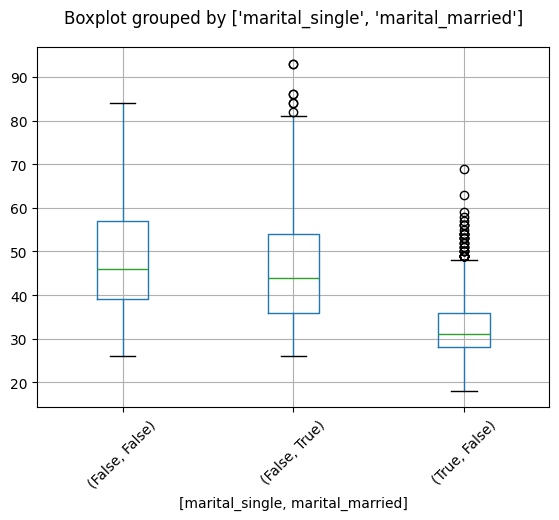

In [897]:
dataset_2.boxplot(column='age', by=['marital_single', 'marital_married'], rot=45)
plt.title("")
plt.show()

In [898]:
ptable = dataset_2.pivot_table(values='age', 
                        index='marital_single',
                        columns='marital_married',  
                        aggfunc=np.median)
ptable

C:\Users\Lorca\AppData\Local\Temp\ipykernel_32812\455397864.py:1: FutureWarning: The provided callable <function median at 0x000001CF7F8237E0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ptable = dataset_2.pivot_table(values='age',


marital_married  False  True 
marital_single               
False             46.0   44.0
True              31.0    NaN

In [899]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_single'], x['marital_married']]

# Replace missing values
dataset_2['age'].fillna(dataset_2[dataset_2['age'].isnull()].apply(get_element, axis=1), inplace=True)

C:\Users\Lorca\AppData\Local\Temp\ipykernel_32812\162242594.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_2['age'].fillna(dataset_2[dataset_2['age'].isnull()].apply(get_element, axis=1), inplace=True)


In [900]:
dataset_2.isna().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
day_sin                0
day_cos                0
month_sin              0
month_cos              0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

Now all the data ise encoded and all the missing values have been filled in.

### Now to apply a Scaler to rescale the features

First I will remove the duration column as I found this one to not provide much context

In [901]:
dataset_2.drop('duration', axis=1, inplace=True)

In [902]:
robust_scaler = RobustScaler()
dataset_2[['balance']] = robust_scaler.fit_transform(dataset_2[['balance']])

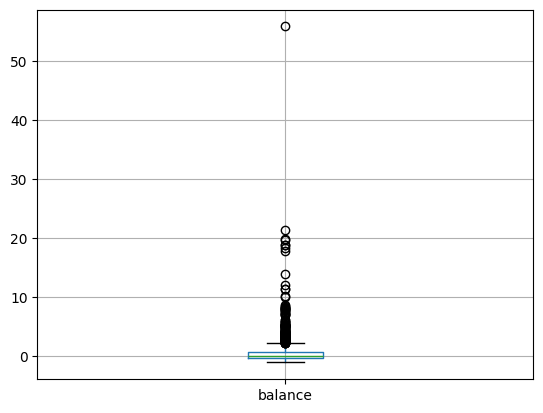

In [903]:
dataset_2.boxplot(column=['balance'])
plt.show()

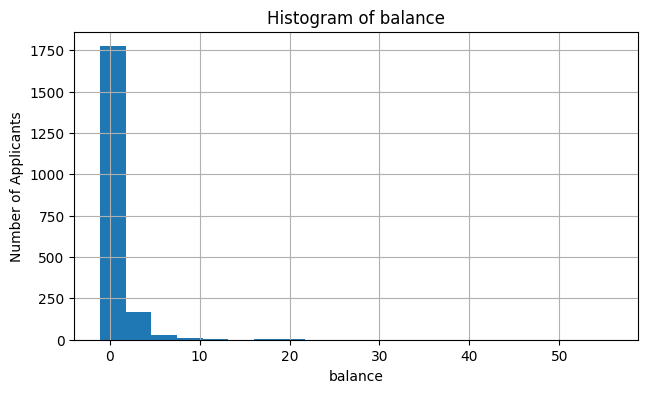

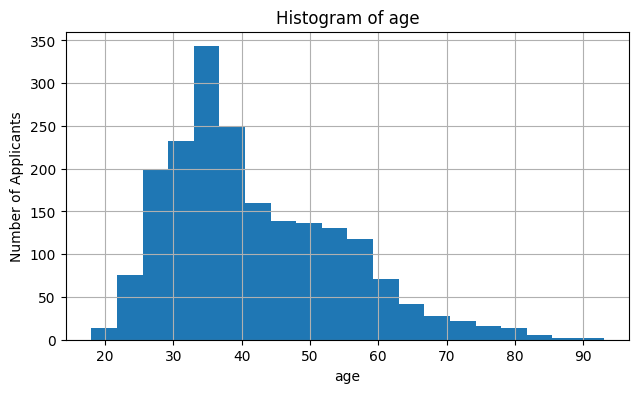

In [904]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Applicants')
dataset_2['balance'].hist(bins=20)

plt.show()

# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
dataset_2['age'].hist(bins=20)

plt.show()

In [905]:
print(dataset_2['balance'].min())
print(dataset_2['age'].min())
print(dataset_2['campaign'].min())

-1.060984060984061
18.0
1


### Reducing outliers on `balance`, `age`, `campaign`, `previous`, `pdays`

Now to apply a log rescale to reduce the outlier impact

In [906]:
# Use a log transformation to decrease the impact of outliers
dataset_2['balance'] = np.log(dataset_2['balance'] + abs(min(dataset_2['balance'])) + 1)
dataset_2['age'] = np.log(dataset_2['age'] + abs(min(dataset_2['age'])) + 1)
dataset_2['campaign'] = np.log(dataset_2['campaign'] + abs(min(dataset_2['campaign'])) + 1)
dataset_2['previous'] = np.log(dataset_2['previous'] + abs(min(dataset_2['previous'])) + 1)
dataset_2['pdays'] = np.log(dataset_2['pdays'] + abs(min(dataset_2['pdays'])) + 1)

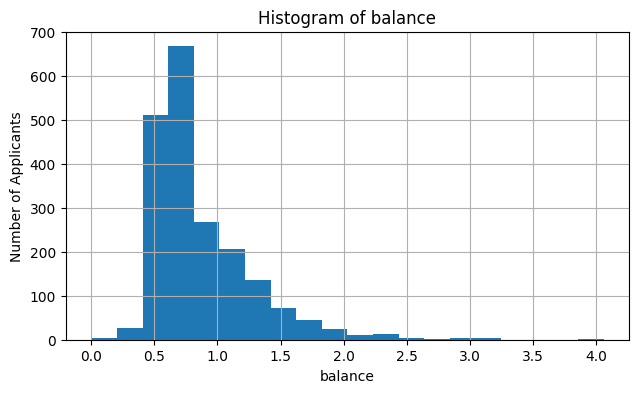

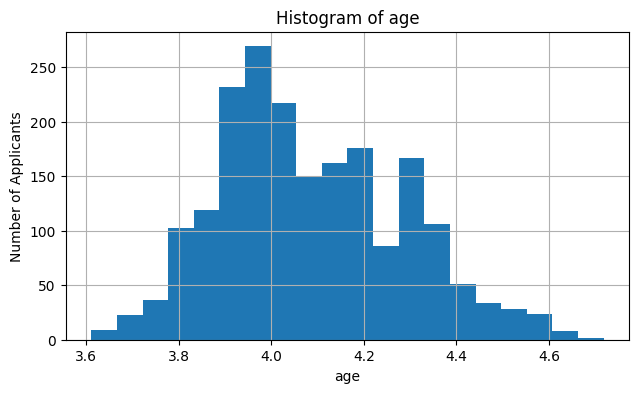

In [907]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Applicants')
dataset_2['balance'].hist(bins=20)

plt.show()

# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
dataset_2['age'].hist(bins=20)

plt.show()

This while still skewed, is far closer to normal then previously was the case for both `balance` and `age` 

In [908]:
dataset_2.value_counts()

age       balance   campaign  pdays     previous  day_sin    day_cos    month_sin  month_cos  education_secondary  education_tertiary  education_nan  contact_telephone  contact_nan  poutcome_other  poutcome_success  poutcome_nan  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_nan  marital_married  marital_single  default_yes  housing_yes  loan_yes  subscribed_yes
3.610918  0.652484  1.791759  0.000000  0.000000   0.848644   0.528964   0.500000  -0.866025  False                False               True           False              False        False           False             True          False            False             False          False           False        False              False         True         False           False           False    False            True            False        False        False     True              1
4.174387  0.567406  1.386294  1.098

### Adding a new Feature `HighRisk`

In [909]:
dataset_2['HighRisk'] = dataset_2[['default_yes', 'housing_yes', 'loan_yes']].all(axis='columns')

In [910]:
dataset_2.value_counts()

age       balance   campaign  pdays     previous  day_sin    day_cos    month_sin  month_cos  education_secondary  education_tertiary  education_nan  contact_telephone  contact_nan  poutcome_other  poutcome_success  poutcome_nan  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_nan  marital_married  marital_single  default_yes  housing_yes  loan_yes  subscribed_yes  HighRisk
3.610918  0.652484  1.791759  0.000000  0.000000   0.848644   0.528964   0.500000  -0.866025  False                False               True           False              False        False           False             True          False            False             False          False           False        False              False         True         False           False           False    False            True            False        False        False     True            False       1
4.174387  0.567

I chose to add `HighRisk` as a column to see who was a high risk client, due to having default credit and having both a housing and personal loan. This could give insight into where this combo of attributes affects the `subscribed` to term deposit or not.